In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [22]:
df=pd.read_csv('drug200.csv')
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
155,49,M,LOW,HIGH,10.537,drugC
191,23,M,HIGH,HIGH,8.011,drugA
55,26,F,LOW,HIGH,14.160,drugC
104,22,M,HIGH,NORMAL,28.294,drugY
192,72,M,LOW,HIGH,16.310,drugY


In [23]:
inputs=df
sex_encoder = LabelEncoder()
BP_encoder = LabelEncoder()
Cholestrol_encoder = LabelEncoder()
drugs_encoder = LabelEncoder()
inputs['sex_n'] = drugs_encoder.fit_transform(inputs['Sex'])
inputs['BP_n'] = drugs_encoder.fit_transform(inputs['BP'])
inputs['Cholestrol_n'] = drugs_encoder.fit_transform(inputs['Cholesterol'])
inputs['drugs_n'] = drugs_encoder.fit_transform(inputs['Drug'])
inputs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,sex_n,BP_n,Cholestrol_n,drugs_n
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


In [24]:
inputs=inputs.drop(["Sex","BP","Cholesterol","Drug"],axis=1)
inputs.head()

,Age,Na_to_K,sex_n,BP_n,Cholestrol_n,drugs_n
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


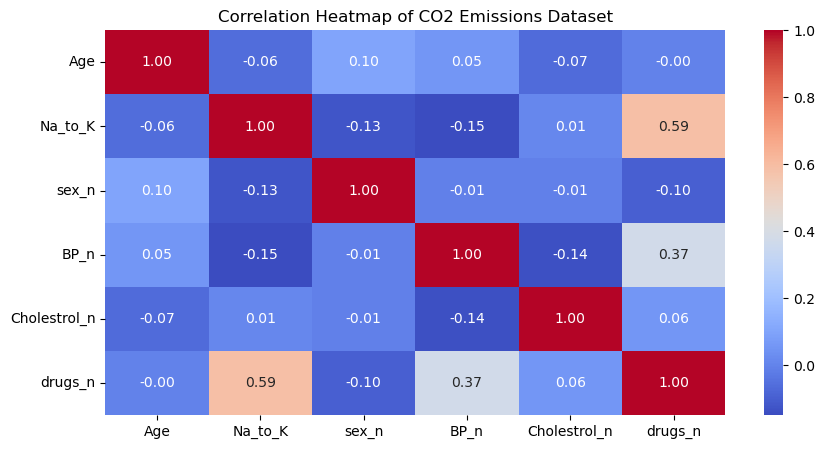

In [29]:
#n_df = inputs.select_dtypes(include=['float64', 'int64'])
correlation_matrix = inputs.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of CO2 Emissions Dataset")
plt.show()

In [53]:
y=inputs["drugs_n"]
x2=inputs.drop(["drugs_n","Age","Na_to_K"],axis=1)
x3=inputs.drop(["drugs_n","Age","BP_n","Cholestrol_n"],axis=1)
x=inputs.drop("drugs_n",axis=1)

In [194]:
x_train,x_test = np.split(x.sample(frac=1),[int(0.8*len(df))])
y_train,y_test = np.split(y.sample(frac=1),[int(0.8*len(df))])

C:\Users\Debdyuti\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\Debdyuti\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [313]:
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.6)

In [315]:
from sklearn.tree import DecisionTreeClassifier

In [317]:
model=DecisionTreeClassifier(max_depth=20,splitter='best',min_samples_leaf=10)

In [319]:
model.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

In [321]:
model.score(x_test1,y_test1)

0.7833333333333333

In [323]:
model.score(x_train1,y_train1)

0.9125

In [247]:
model.predict_proba(x_test1)

array([[0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.46153846, 0.53846154, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.57894737, 0.42105263, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.46153846, 0.53846154, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.46153846, 0.53846154, 0.        ],
       [0.        , 0.        , 0.46153846, 0.53846154, 0.        ],
       [0.        , 0.        , 0.

In [249]:
pred=model.predict(x_test1)
pred

array([3, 3, 3, 3, 4, 4, 0, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 0, 3, 4, 4, 0,
       4, 4, 0, 4, 4, 3, 4, 3, 4, 4, 3, 4, 0, 3, 0, 4, 3, 3, 0, 4, 4, 0,
       0, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 0, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4,
       3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 0, 4, 0, 3, 4, 0, 3, 0, 3, 0, 4,
       0, 4, 4, 0, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 0, 4, 4, 0, 3, 4, 4, 3,
       4, 3, 4, 0, 3, 4, 4, 3, 3, 4])

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,pred)

0.8416666666666667